### Poojitha Venkatram

#### Assignment 4- Part 2

#### https://github.com/poojithavenkatram/Deep-Learning

# Squid Bat Butterfly Dataset

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/107.7 GB disk)


## Data preprocessing

### Data download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Squid Bat Butterfly'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the Dataset

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Base path to the dataset
base_dataset_path = '/content/drive/MyDrive/Squid Bat Butterfly'

# Paths to the folders containing the images and labels
images_path = os.path.join(base_dataset_path, 'images')
labels_path = os.path.join(base_dataset_path, 'labels')

# List all images
images = os.listdir(images_path)

# Ensure the same random state for images and labels
random.seed(42)

# Select 20 images randomly
selected_images = random.sample(images, 20)

# Splitting the selected images into train, validation, and test sets
train_images, test_val_images = train_test_split(selected_images, test_size=0.2, random_state=42)
val_images, test_images = train_test_split(test_val_images, test_size=0.5, random_state=42)

# Base path for the split dataset directories
split_base_path = os.path.join(base_dataset_path, 'split')

# Ensuring that the directories for train, val, and test sets exist for both images and labels
for set_name in ['train', 'val', 'test']:
    for content_type in ['images', 'labels']:
        set_path = os.path.join(split_base_path, set_name, content_type)
        os.makedirs(set_path, exist_ok=True)

# Function to move selected files (images and labels) to their respective set directories
def move_files(files, set_name):
    for filename in files:
        # Determine the file extension for labels assuming a pattern (e.g., .txt for labels)
        label_filename = os.path.splitext(filename)[0] + '.txt'

        # Paths for source and destination of images
        src_img_path = os.path.join(images_path, filename)
        dst_img_path = os.path.join(split_base_path, set_name, 'images', filename)

        # Paths for source and destination of labels
        src_label_path = os.path.join(labels_path, label_filename)
        dst_label_path = os.path.join(split_base_path, set_name, 'labels', label_filename)

        # Copy files
        shutil.copy(src_img_path, dst_img_path)
        if os.path.exists(src_label_path):  # Check if the label file exists
            shutil.copy(src_label_path, dst_label_path)

# Moving the files to their respective directories
move_files(train_images, 'train')
move_files(val_images, 'val')
move_files(test_images, 'test')

print("Dataset split into train, val, and test sets successfully.")

Dataset split into train, val, and test sets successfully.


### Show the first five images and labels from the training set

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, labels_dir, transform=None):
        self.img_dir = img_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.img_names = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]

        # Debug print to check how many images were found
        print(f"Found {len(self.img_names)} images in {img_dir}")

        if len(self.img_names) == 0:
            raise RuntimeError(f"No images found in {img_dir}. Check the directory and file permissions.")

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_names[idx])
        image = Image.open(img_path).convert('RGB')

        label_path = os.path.join(self.labels_dir, self.img_names[idx].replace('.jpg', '.txt'))
        if not os.path.exists(label_path):
            print(f"Label file not found for image: {img_path}")
            return None  # Or handle missing label files as needed

        with open(label_path, 'r') as f:
            label = f.read().strip()

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
from torch.utils.data import DataLoader

# Adjust these paths if you have separate splits
train_dataset = CustomImageDataset(
    img_dir='/content/drive/MyDrive/Squid Bat Butterfly/split/train/images',
    labels_dir='/content/drive/MyDrive/Squid Bat Butterfly/labels',
    transform=data_transforms
)

# Assuming similar structure for validation and testing, you would initialize them similarly
# For demonstration, let's proceed with just the train_dataset

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

Found 16 images in /content/drive/MyDrive/Squid Bat Butterfly/split/train/images


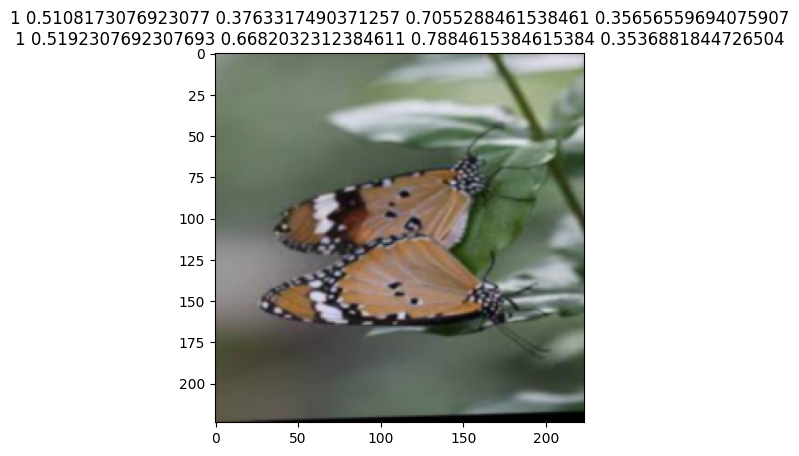

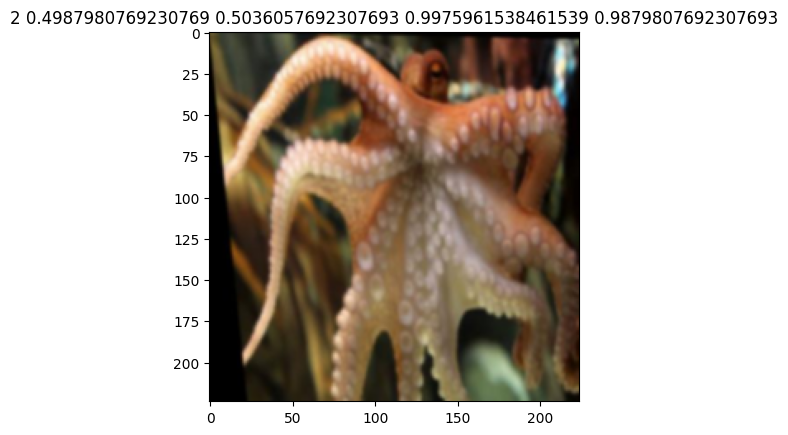

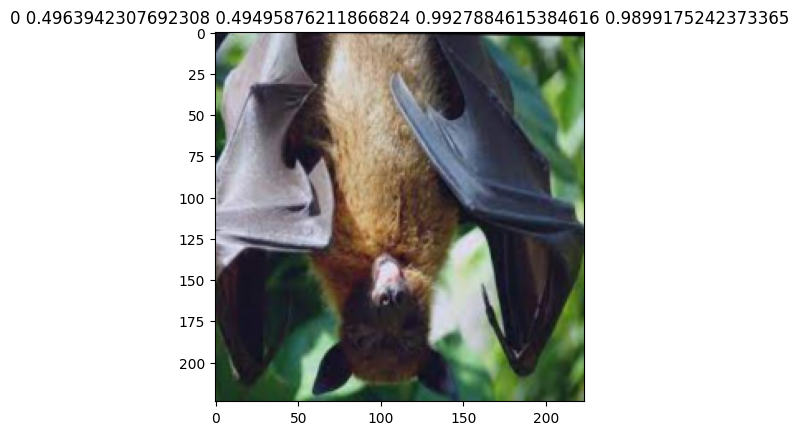

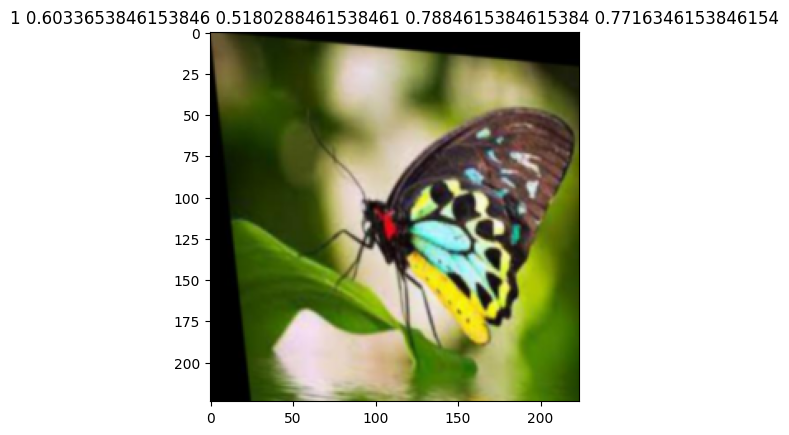

In [ ]:
import matplotlib.pyplot as plt

def imshow(img, label):
    plt.imshow(img.permute(1, 2, 0))  # Reorder dimensions to match what plt expects
    plt.title(label)
    plt.show()

# Fetch a batch of data
images, labels = next(iter(train_loader))

# Visualize the first few images in the batch
for i in range(min(len(images), 5)):  # Show up to 5 images
    imshow(images[i], labels[i])

In [12]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [13]:
from ultralytics import YOLO

from IPython.display import display, Image

## Training

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
%cd /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Squid Bat Butterfly
New https://pypi.org/project/ultralytics/8.1.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize

In [17]:
!ls runs/detect/train/

args.yaml  weights


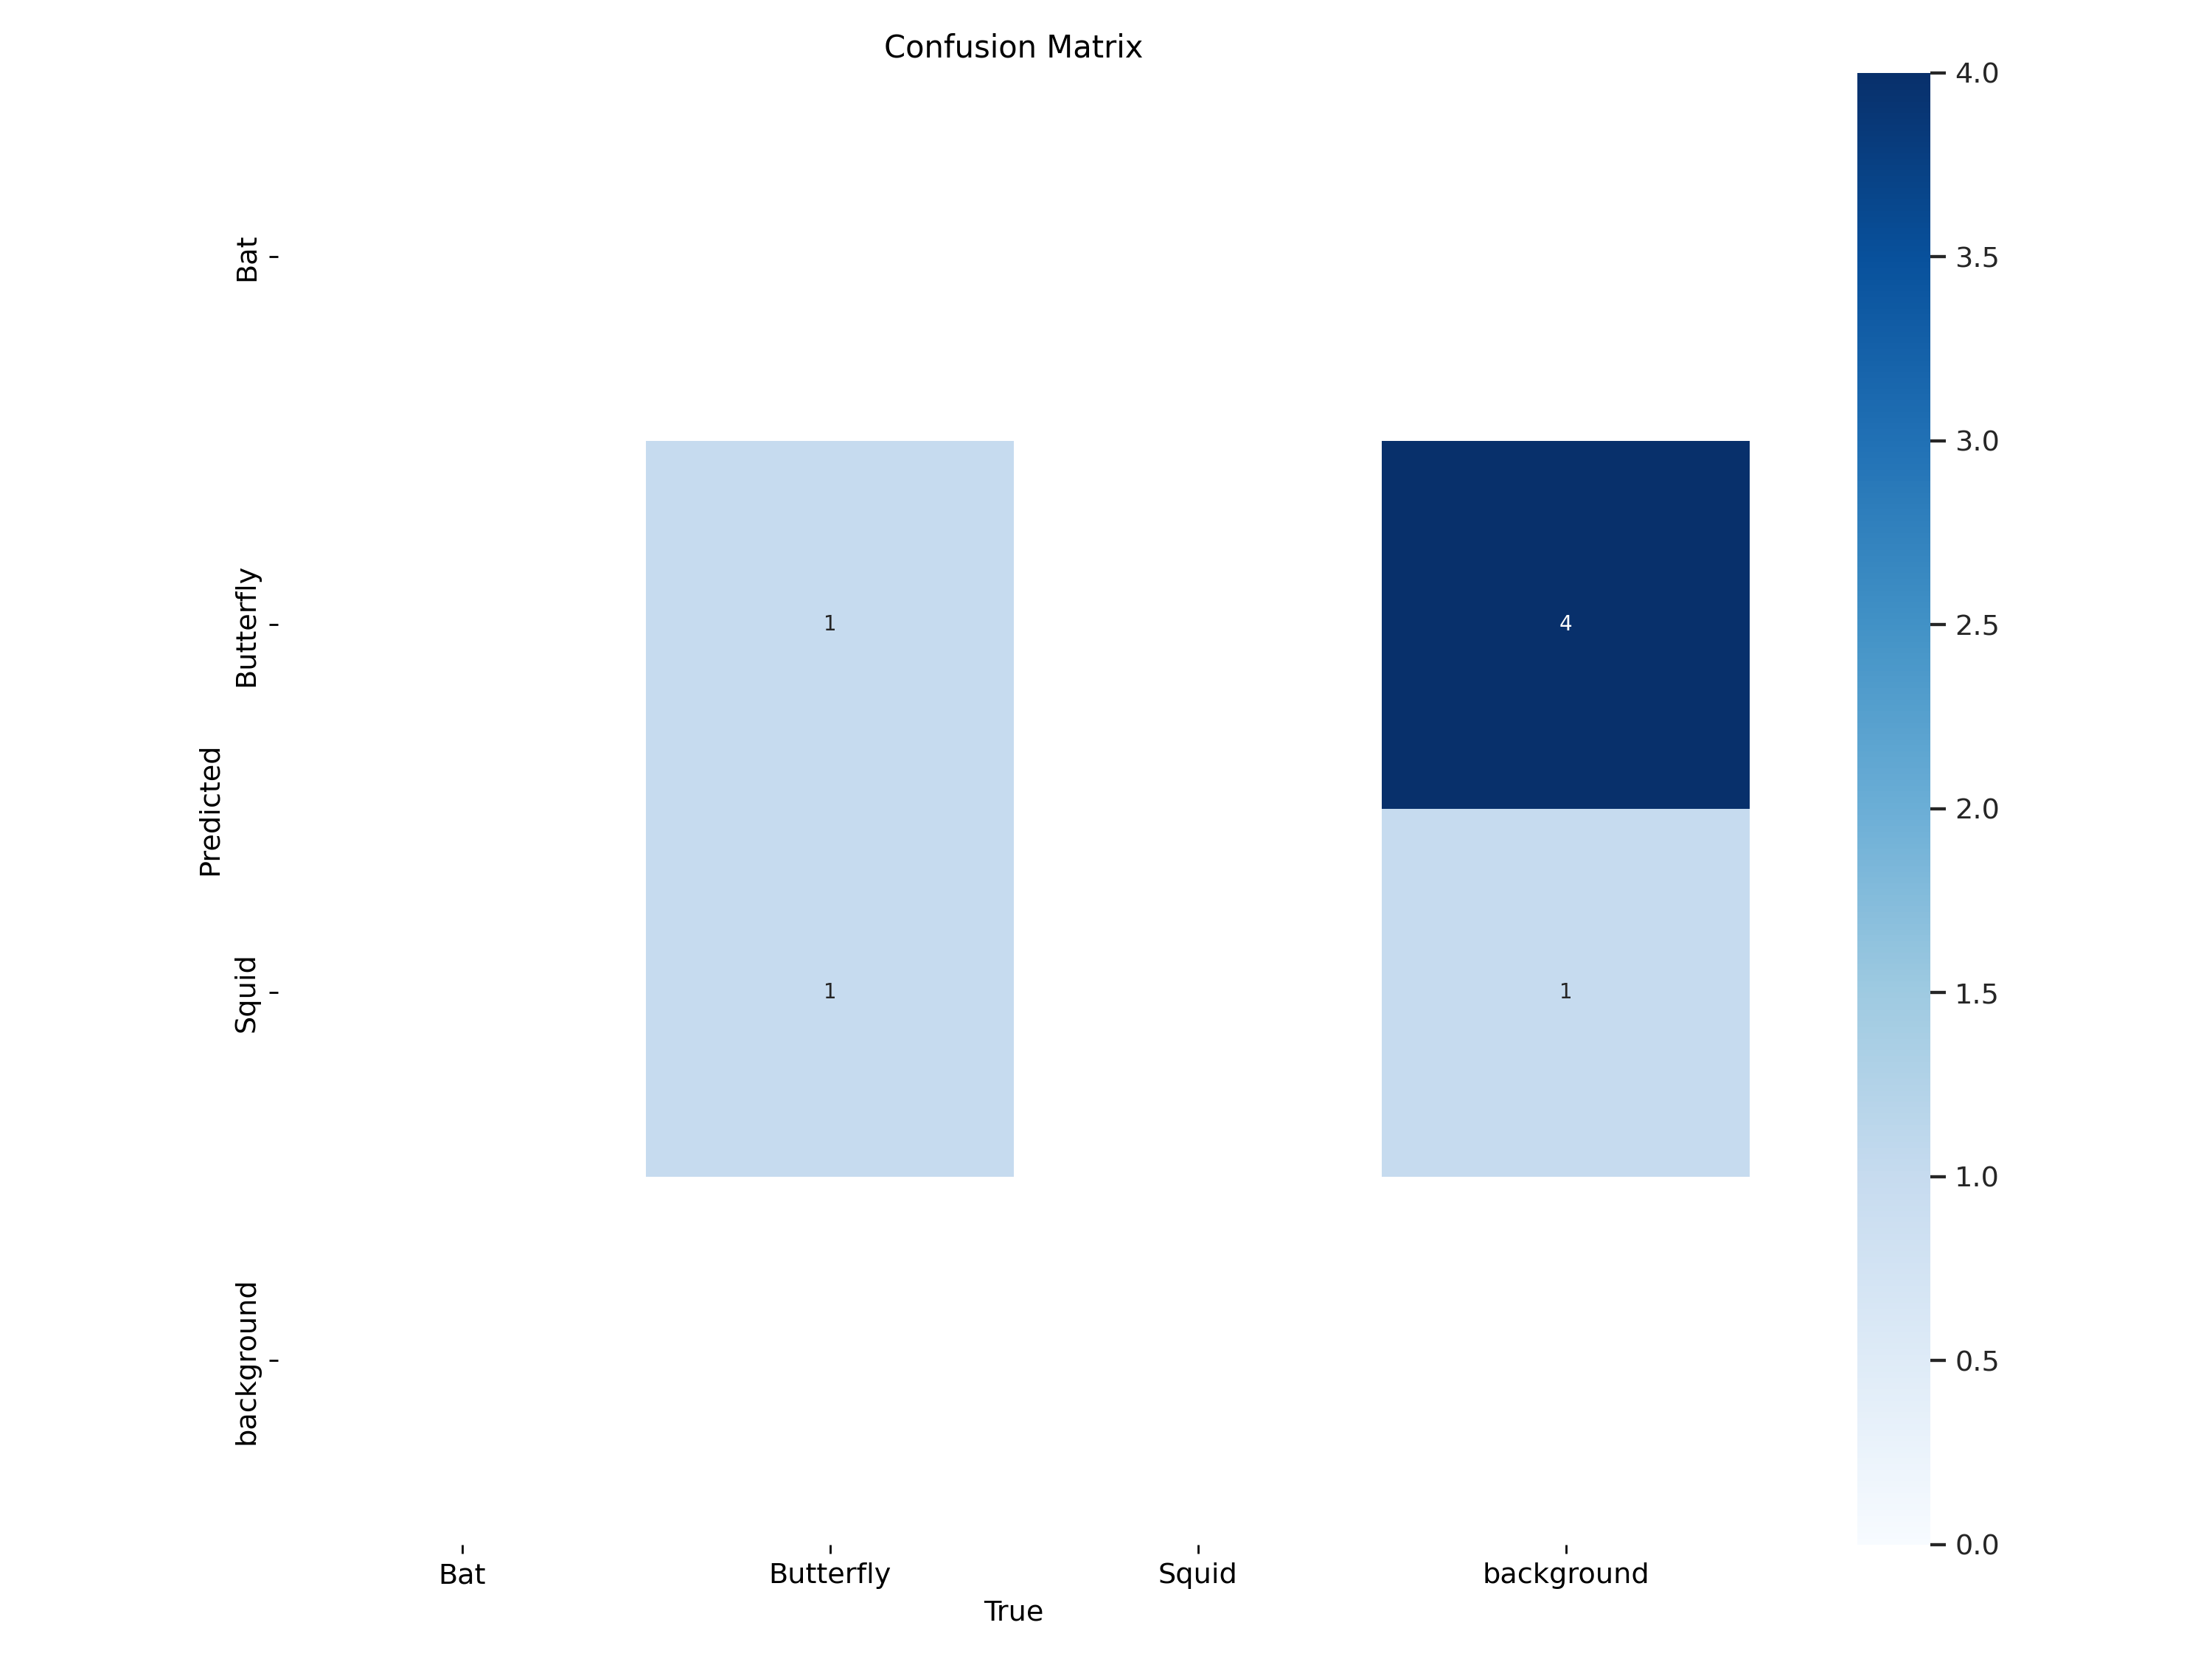

In [18]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

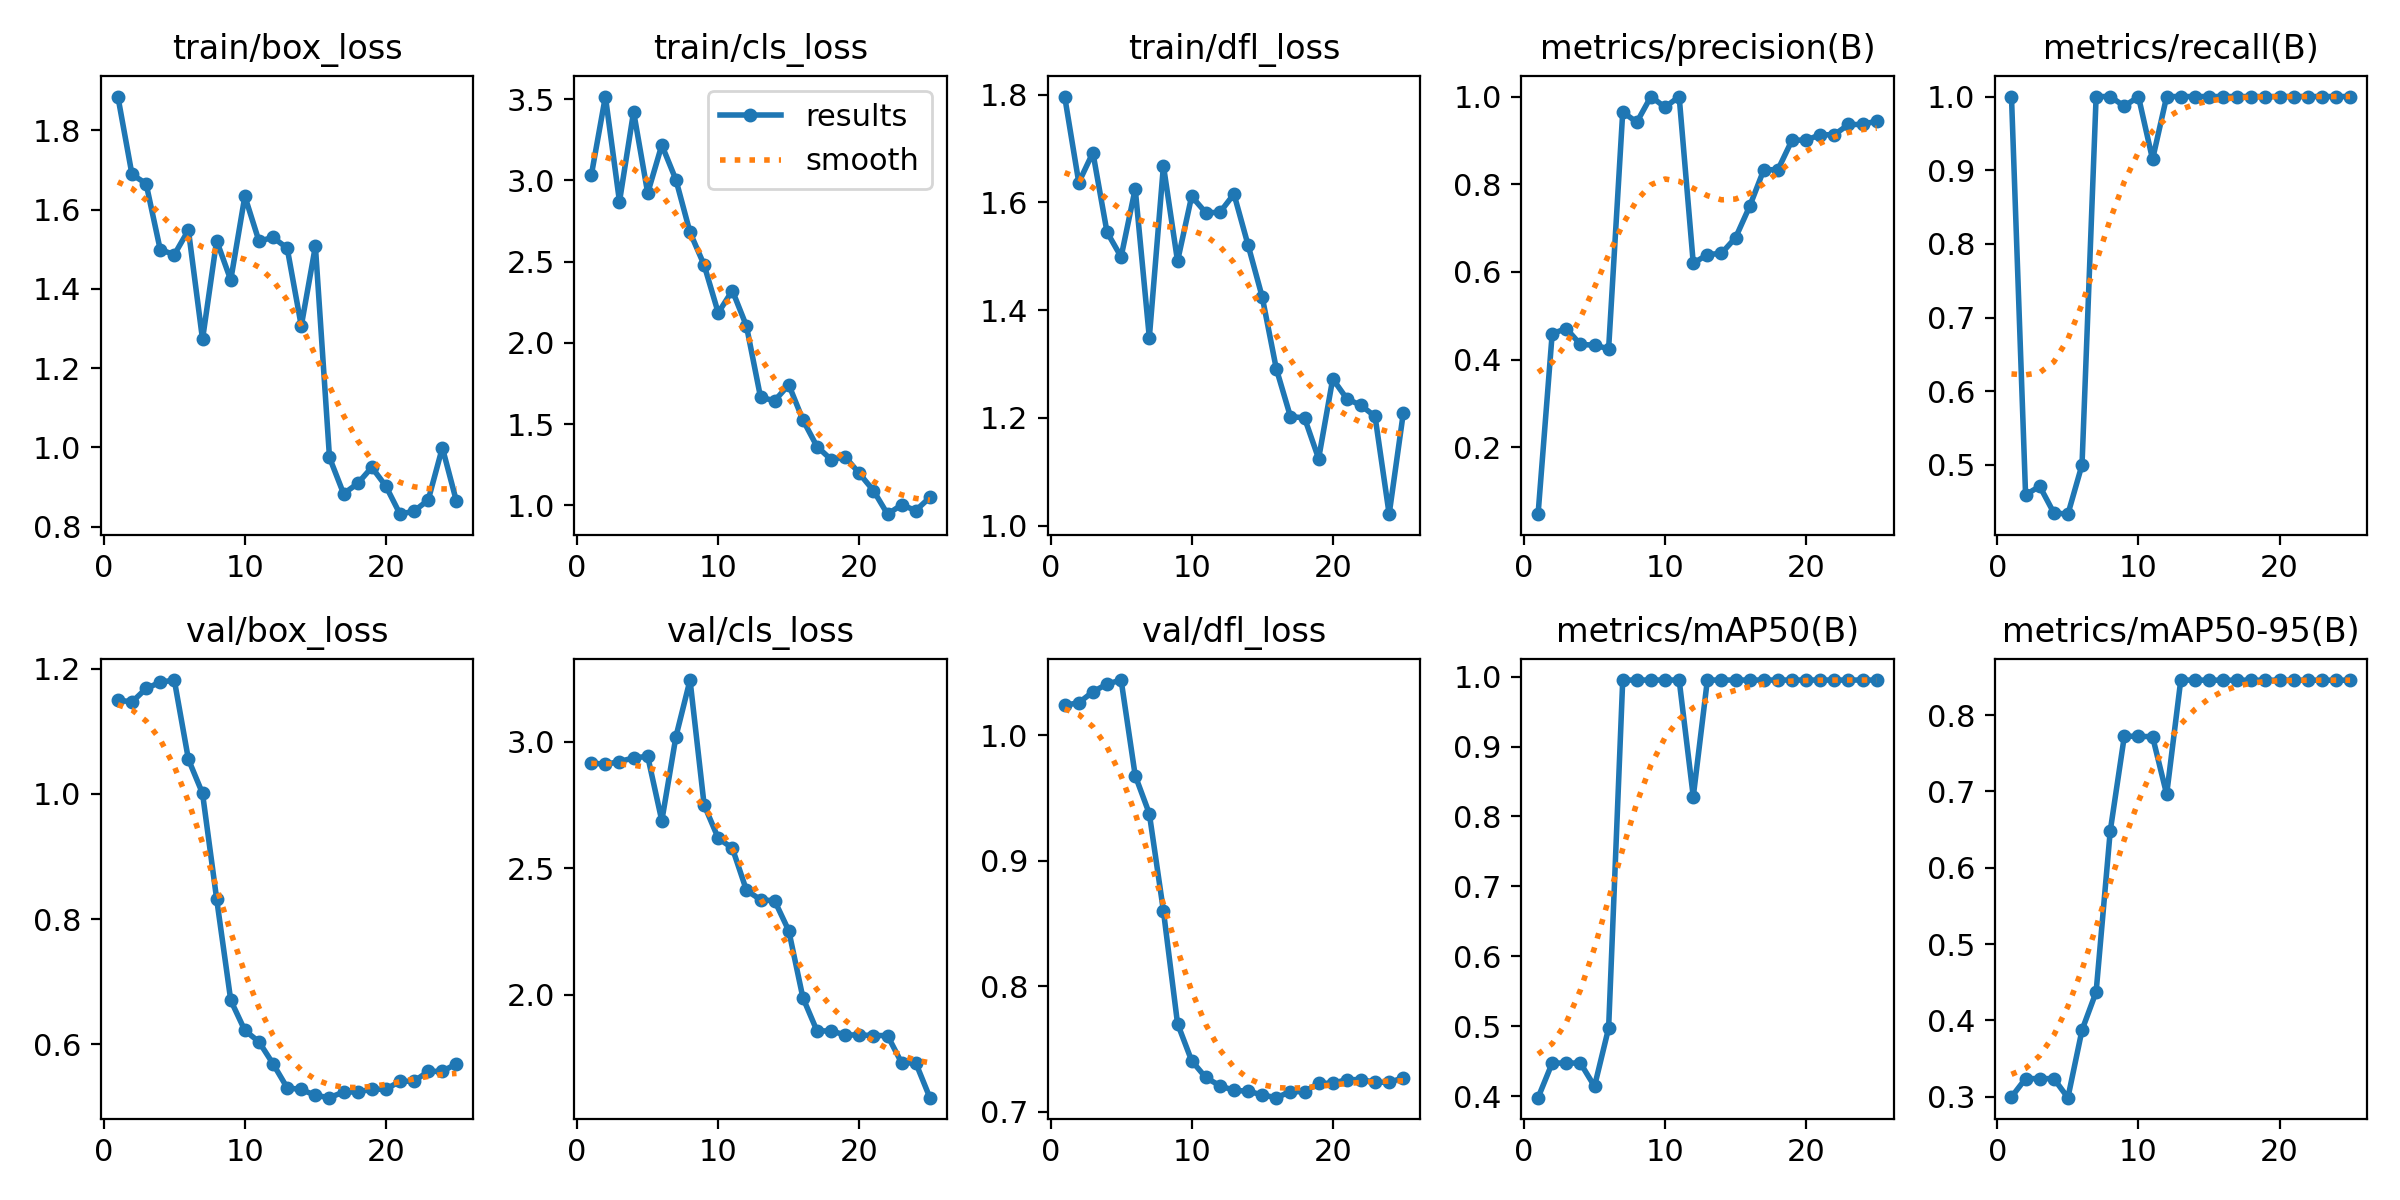

In [20]:
Image(filename='runs/detect/train3/results.png', width=600)

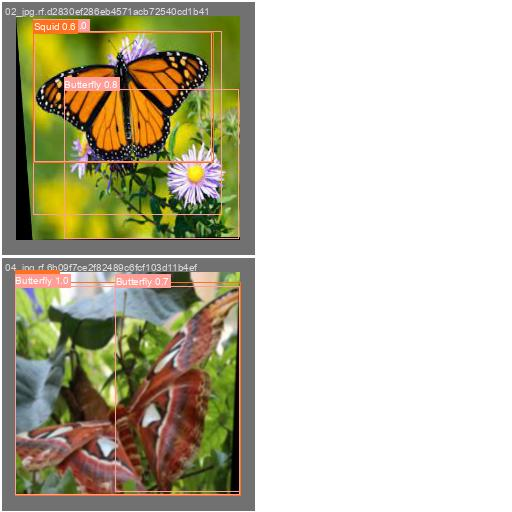

In [21]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [28]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/split/val/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.48it/s]
                   all          2          2      0.638          1      0.995      0.846
             Butterfly          2          2      0.638          1      0.995      0.846
Speed: 0.4ms preprocess, 40.6ms inference, 0.0ms loss, 262.3ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [33]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=runs/detect/val

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val/F1_curve.png: 160x224 3 Bats, 1 Butterfly, 76.5ms
image 2/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val/PR_curve.png: 160x224 (no detections), 12.8ms
image 3/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val/P_curve.png: 160x224 4 Bats, 1 Butterfly, 7.5ms
image 4/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val/R_curve.png: 160x224 1 Butterfly, 7.2ms
image 5/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val/confusion_matrix.png: 192x224 (no detections), 117.5ms
image 6/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val/confusion_matrix_normalized.png: 192x224 (no detections), 8.5ms
image

In [34]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=runs/detect/val2

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val2/F1_curve.png: 160x224 3 Bats, 1 Butterfly, 69.6ms
image 2/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val2/PR_curve.png: 160x224 (no detections), 7.1ms
image 3/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val2/P_curve.png: 160x224 4 Bats, 1 Butterfly, 7.8ms
image 4/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val2/R_curve.png: 160x224 1 Butterfly, 7.0ms
image 5/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val2/confusion_matrix.png: 192x224 (no detections), 72.0ms
image 6/8 /content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/val2/confusion_matrix_normal

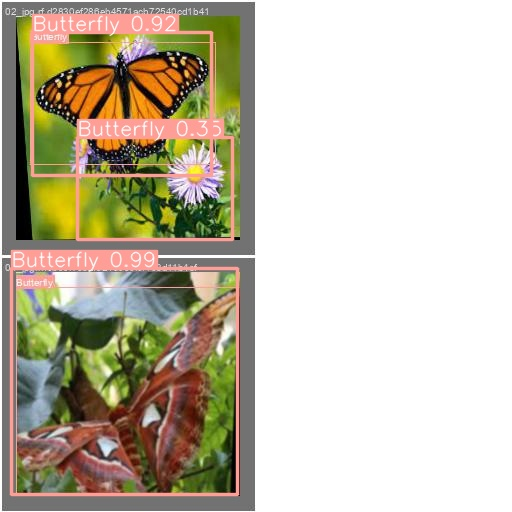

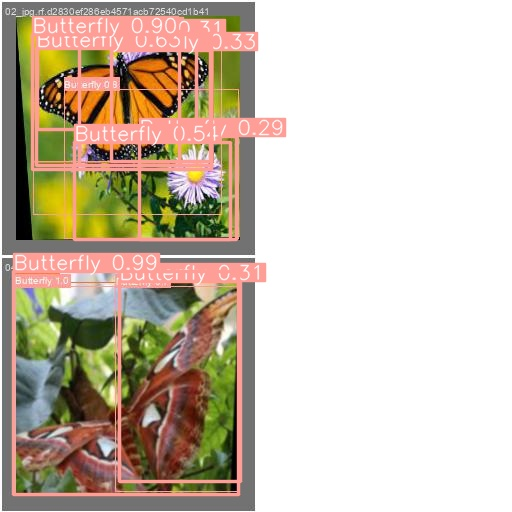

In [35]:
import glob
from IPython.display import Image, display

# Providing the path
image_paths = glob.glob('/content/drive/MyDrive/My Courses/YOLOv8/Squid Bat Butterfly/runs/detect/predict/*.jpg')

# Displaying the first three images
for image_path in image_paths[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")